# UB DataScience: Complex networks
### David Solans & Gerard Martinez

In [37]:

import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
from networkx.algorithms import community
import collections
import numpy as np

%matplotlib inline

## Exploratory Data Analysis¶

In [28]:
G = nx.read_edgelist("barcelona_transport.edgelist", create_using = nx.Graph(), nodetype = int)
G_bus = nx.read_edgelist("barcelona_bus.edgelist", create_using = nx.Graph(), nodetype = int)
G_metro = nx.read_edgelist("barcelona_metro.edgelist", create_using = nx.Graph(), nodetype = int)

In [3]:
#Quick snapshot of the Network
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2497
Number of edges: 3296
Average degree:   2.6400


In [30]:
#Quick snapshot of the Network
print(nx.info(G_bus))

Name: 
Type: Graph
Number of nodes: 2469
Number of edges: 3127
Average degree:   2.5330


In [29]:
#Quick snapshot of the Network
print(nx.info(G_metro))

Name: 
Type: Graph
Number of nodes: 156
Number of edges: 169
Average degree:   2.1667


In [4]:
nodes = list(G.nodes())

In [5]:
def plotNetwork(G, node_categories, colormap="jet", pos=None):
    plt.axis("off")
    if pos == None:
        pos = spring_pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos = pos, cmap = plt.get_cmap(colormap), node_color = node_categories, node_size = 35, with_labels = False)

In [6]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)

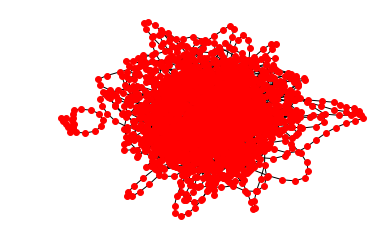

In [7]:
#To be checke for drawing: https://stackoverflow.com/questions/32488772/drawing-nodes-with-coordinates-in-correct-position-using-networkx-matplotlib
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 35)

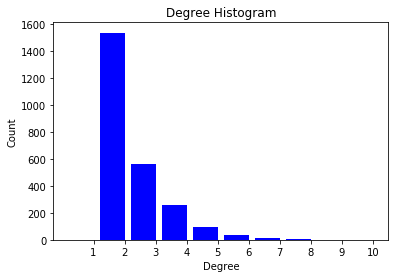

In [8]:
# Nodes degree histogram
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

In [9]:
# Degree per node
nodes_degrees = [0]*len(nodes)
for idx, n in enumerate(nodes):
    nodes_degrees [idx] = G.degree(n)

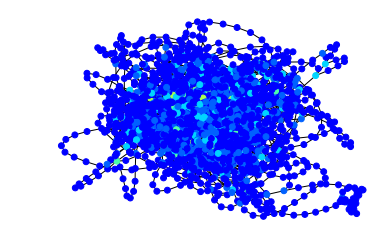

In [10]:
plotNetwork(G, nodes_degrees)

In [39]:
# Average separation of nodes
node_distances = []
for g in nx.connected_component_subgraphs(G): 
    node_distances.append(nx.average_shortest_path_length(g)) 

    
print("Average separation of nodes: {}".format(np.mean(node_distances)))

Average separation of nodes: 8.72475195847366


In [40]:
# Average separation of nodes in metro
node_distances_metro = []
for g in nx.connected_component_subgraphs(G_metro): 
    node_distances_metro.append(nx.average_shortest_path_length(g)) 

    
print("Average separation of nodes in metro network: {}".format(np.mean(node_distances_metro)))

Average separation of nodes in metro network: 6.405542040656544


In [41]:
# Average separation of nodes in bus
node_distances_bus = []
for g in nx.connected_component_subgraphs(G_bus): 
    node_distances_bus.append(nx.average_shortest_path_length(g)) 

    
print("Average separation of nodes in bus network: {}".format(np.mean(node_distances_bus)))

Average separation of nodes in bus network: 9.731034826202404


## Adjacency matrix

In [44]:
adjacency_matrix = nx.adjacency_matrix(G, nodelist=None, weight='weight')

In [46]:
np.linalg.eig(adjacency_matrix)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## Laplacian matrix

In [47]:
laplacian_matrix = nx.laplacian_matrix(G, nodelist=None, weight='weight')
np.linalg.eig(adjacency_matrix)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## Centralities

In [51]:
nx.degree_centrality(G)

{91: 0.0016025641025641025,
 26: 0.0016025641025641025,
 3225: 0.001201923076923077,
 2968: 0.0008012820512820513,
 334: 0.0016025641025641025,
 41: 0.002003205128205128,
 2585: 0.0008012820512820513,
 24: 0.002003205128205128,
 33: 0.0016025641025641025,
 524: 0.001201923076923077,
 483: 0.001201923076923077,
 1381: 0.0016025641025641025,
 140: 0.002003205128205128,
 1763: 0.0008012820512820513,
 682: 0.0016025641025641025,
 101: 0.0008012820512820513,
 1004: 0.0016025641025641025,
 209: 0.001201923076923077,
 2069: 0.0008012820512820513,
 68: 0.0016025641025641025,
 73: 0.002003205128205128,
 149: 0.0016025641025641025,
 105: 0.0016025641025641025,
 130: 0.002003205128205128,
 754: 0.001201923076923077,
 1539: 0.0008012820512820513,
 1029: 0.0008012820512820513,
 129: 0.002403846153846154,
 1129: 0.0008012820512820513,
 8338: 0.001201923076923077,
 1226: 0.0008012820512820513,
 37: 0.0008012820512820513,
 67: 0.0008012820512820513,
 75: 0.0016025641025641025,
 1119: 0.001602564102564

In [50]:
nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06, nstart=None, weight='weight')

{91: 0.0017818245384538195,
 26: 0.005085543774965655,
 3225: 0.0006604087268269168,
 2968: 0.0004577412749172079,
 334: 0.0012012765778093885,
 41: 0.003658331223013691,
 2585: 0.0013728210913101536,
 24: 0.014321360278608569,
 33: 0.002358521160338782,
 524: 0.003273564045069463,
 483: 0.0020178904745754033,
 1381: 0.0024661339992614138,
 140: 0.002509346789026841,
 1763: 0.0006117871853413807,
 682: 0.0030215149601739246,
 101: 0.00280313859176712,
 1004: 0.0017363172611055714,
 209: 0.0028693988566613243,
 2069: 0.0006598866913784678,
 68: 0.009143207207705204,
 73: 0.0087604560263178,
 149: 0.016110942492540952,
 105: 0.010338296720106707,
 130: 0.016069770458439023,
 754: 0.005905228773319808,
 1539: 0.002248564845481523,
 1029: 0.0030543932933367675,
 129: 0.021009377086729106,
 1129: 0.00417414357618332,
 8338: 0.028489133389957247,
 1226: 0.004374702929685641,
 37: 0.01913776205601628,
 67: 0.005762327604032837,
 75: 0.03334160931385438,
 1119: 0.007462119448866534,
 533: 0.00

In [52]:
nx.closeness_centrality(G)

{91: 0.10494172923889948,
 26: 0.1122516953919468,
 3225: 0.09906572290735877,
 2968: 0.09479707081705416,
 334: 0.09902264148839492,
 41: 0.11068029169424203,
 2585: 0.1014220142098633,
 24: 0.11912868269465529,
 33: 0.10827511369594109,
 524: 0.10579499331067421,
 483: 0.10317288812984328,
 1381: 0.10485957361389091,
 140: 0.10680733810336514,
 1763: 0.09886356551865409,
 682: 0.10605615468214444,
 101: 0.1056673460961363,
 1004: 0.10245334717775663,
 209: 0.10321497851528222,
 2069: 0.09612976067149243,
 68: 0.10956720436077573,
 73: 0.10733092816524352,
 149: 0.11195366738903788,
 105: 0.10754891559728137,
 130: 0.11124807704835064,
 754: 0.10185299879341748,
 1539: 0.09686173392145828,
 1029: 0.09827897798893527,
 129: 0.11188765372834952,
 1129: 0.10056645353880582,
 8338: 0.1146134615707274,
 1226: 0.1006998779862746,
 37: 0.10821850867476075,
 67: 0.10360948450769629,
 75: 0.11326795209797748,
 1119: 0.10387416819605132,
 533: 0.10066871395842615,
 116: 0.11588506494099655,
 80

In [53]:
nx.betweenness_centrality_source(G)

{91: 0.020218898212184186,
 26: 0.02682012980946706,
 3225: 0.014991340752606632,
 2968: 0.0018617946016131817,
 334: 0.012239242880560634,
 41: 0.022048967265856798,
 2585: 0.005751282953468195,
 24: 0.0530872965068478,
 33: 0.018970203168309836,
 524: 0.005350975390188673,
 483: 0.004531540431290804,
 1381: 0.012604915775555088,
 140: 0.021634598256658755,
 1763: 0.005400432909703182,
 682: 0.00985420265225449,
 101: 0.007505690768923505,
 1004: 0.020850643644791476,
 209: 0.0060021295462228995,
 2069: 0.0012941164063842128,
 68: 0.012576079906835975,
 73: 0.011246719537848438,
 149: 0.012732669161715398,
 105: 0.00878616939064107,
 130: 0.012692610765048075,
 754: 0.00690253874171984,
 1539: 0.00202279531401718,
 1029: 0.0018666669654339766,
 129: 0.019700660944975735,
 1129: 0.0036005314275334523,
 8338: 0.00845112595380529,
 1226: 0.0007747521385374008,
 37: 0.006004531734369761,
 67: 0.005220058416973675,
 75: 0.013270949109932194,
 1119: 0.009507187094595956,
 533: 0.00375586669

### Parallel Betweenness Centrality

In [12]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [13]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [14]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

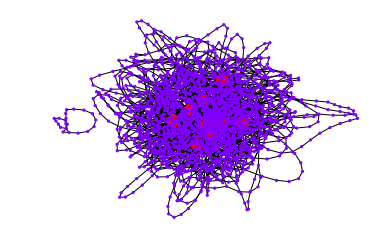

Process ForkPoolWorker-12:
Process ForkPoolWorker-11:
Process ForkPoolWorker-9:
Process ForkPoolWorker-10:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File 

In [17]:
bt = between_parallel(G)
top = 10

max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(nodes)
bt_colors = [0]*len(nodes)
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

## Community Detection

In [18]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
parts = sorted(map(sorted, next_level_communities))

In [19]:
node_communities = [0]*len(nodes)
for idx,c in enumerate(parts):
    for n in c:
        node_communities[nodes.index(n)] = idx
     

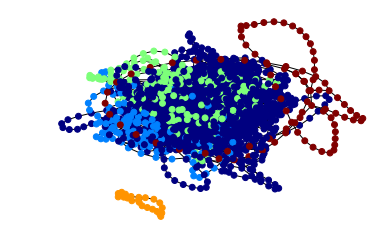

In [20]:
plotNetwork(G,node_communities)

In [21]:
help(community)

Help on package networkx.algorithms.community in networkx.algorithms:

NAME
    networkx.algorithms.community - Functions for computing and measuring community structure.

DESCRIPTION
    The functions in this class are not imported into the top-level
    :mod:`networkx` namespace. You can access these functions by importing
    the :mod:`networkx.algorithms.community` module, then accessing the
    functions as attributes of ``community``. For example::
    
        >>> import networkx as nx
        >>> from networkx.algorithms import community
        >>> G = nx.barbell_graph(5, 1)
        >>> communities_generator = community.girvan_newman(G)
        >>> top_level_communities = next(communities_generator)
        >>> next_level_communities = next(communities_generator)
        >>> sorted(map(sorted, next_level_communities))
        [[0, 1, 2, 3, 4], [5], [6, 7, 8, 9, 10]]

PACKAGE CONTENTS
    asyn_fluidc
    centrality
    community_generators
    community_utils
    kclique
    ke